In [48]:
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline
from sutils import *
import os, json
from glob import glob

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model,load_model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K


In [49]:
limit_gpu_mem()

In [50]:
#path = "data/dogscats/"
path = "dataset/dogscats/sample/"

In [51]:
batch_size=8
no_of_epochs=10

In [52]:
# Prepare images for training in batches
# NB: They must be in subdirectories named based on their category
batches = get_batches(path+'train', batch_size=batch_size)
val_batches = get_batches(path+'valid', batch_size=batch_size*2)

Found 76 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


This will download the Inception weights from
https://github.com/fchollet/deep-learning-models/releases/download/v0.5/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [53]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

In [54]:
base_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_189 (Conv2D)              (None, None, None, 32 864         input_3[0][0]                    
____________________________________________________________________________________________________
batch_normalization_189 (BatchNo (None, None, None, 32 96          conv2d_189[0][0]                 
____________________________________________________________________________________________________
activation_189 (Activation)      (None, None, None, 32 0           batch_normalization_189[0][0]    
___________________________________________________________________________________________

In [57]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- one for dog and one for cat... 
predictions = Dense(2, activation='softmax')(x)


In [58]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [56]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    print(layer.name)
    layer.trainable = False


input_3
conv2d_189
batch_normalization_189
activation_189
conv2d_190
batch_normalization_190
activation_190
conv2d_191
batch_normalization_191
activation_191
max_pooling2d_9
conv2d_192
batch_normalization_192
activation_192
conv2d_193
batch_normalization_193
activation_193
max_pooling2d_10
conv2d_197
batch_normalization_197
activation_197
conv2d_195
conv2d_198
batch_normalization_195
batch_normalization_198
activation_195
activation_198
average_pooling2d_19
conv2d_194
conv2d_196
conv2d_199
conv2d_200
batch_normalization_194
batch_normalization_196
batch_normalization_199
batch_normalization_200
activation_194
activation_196
activation_199
activation_200
mixed0
conv2d_204
batch_normalization_204
activation_204
conv2d_202
conv2d_205
batch_normalization_202
batch_normalization_205
activation_202
activation_205
average_pooling2d_20
conv2d_201
conv2d_203
conv2d_206
conv2d_207
batch_normalization_201
batch_normalization_203
batch_normalization_206
batch_normalization_207
activation_201
activ

In [59]:
for layer in model.layers:
    print(layer.name)
    print(layer.trainable)

input_3
False
conv2d_189
False
batch_normalization_189
False
activation_189
False
conv2d_190
False
batch_normalization_190
False
activation_190
False
conv2d_191
False
batch_normalization_191
False
activation_191
False
max_pooling2d_9
False
conv2d_192
False
batch_normalization_192
False
activation_192
False
conv2d_193
False
batch_normalization_193
False
activation_193
False
max_pooling2d_10
False
conv2d_197
False
batch_normalization_197
False
activation_197
False
conv2d_195
False
conv2d_198
False
batch_normalization_195
False
batch_normalization_198
False
activation_195
False
activation_198
False
average_pooling2d_19
False
conv2d_194
False
conv2d_196
False
conv2d_199
False
conv2d_200
False
batch_normalization_194
False
batch_normalization_196
False
batch_normalization_199
False
batch_normalization_200
False
activation_194
False
activation_196
False
activation_199
False
activation_200
False
mixed0
False
conv2d_204
False
batch_normalization_204
False
activation_204
False
conv2d_202
False


In [60]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:

test = batches.next()

len(test[1][0])
test[1][2]

array([ 0.,  1.], dtype=float32)

In [62]:
hist = model.fit_generator(batches, steps_per_epoch=8, epochs=no_of_epochs,verbose=1,
                validation_data=val_batches, validation_steps=3)

Epoch 1/10
8/8 [==============================] - 63s - loss: 1.2181 - acc: 0.5469 - val_loss: 0.9109 - val_acc: 0.5000
Epoch 2/10
8/8 [==============================] - 62s - loss: 0.3251 - acc: 0.8111 - val_loss: 1.1308 - val_acc: 0.5000
Epoch 3/10
8/8 [==============================] - 61s - loss: 0.1982 - acc: 0.9213 - val_loss: 1.0840 - val_acc: 0.5000
Epoch 4/10
8/8 [==============================] - 60s - loss: 0.4208 - acc: 0.8444 - val_loss: 0.8971 - val_acc: 0.6250
Epoch 5/10
8/8 [==============================] - 61s - loss: 1.6239 - acc: 0.6694 - val_loss: 0.4354 - val_acc: 0.6250
Epoch 6/10
8/8 [==============================] - 63s - loss: 0.3039 - acc: 0.8906 - val_loss: 0.5575 - val_acc: 0.6250
Epoch 7/10
8/8 [==============================] - 64s - loss: 0.1510 - acc: 0.9685 - val_loss: 0.2554 - val_acc: 0.8750
Epoch 8/10
8/8 [==============================] - 62s - loss: 0.5016 - acc: 0.8269 - val_loss: 1.2227 - val_acc: 0.6250
Epoch 9/10
8/8 [========================

In [63]:
metrics = model.evaluate_generator(val_batches,10,10,workers=1,pickle_safe=False)
print("model accuracy:",metrics[1])

model accuracy: 1.0


In [43]:
model.save('cats-dogs.hdf5')

In [44]:
model = load_model('cats-dogs.hdf5')

In [64]:
import os
cwd = os.getcwd()
print(cwd)
image_path = 'dataset/dogscats/test1/'

C:\dev\third-party\saurav\statistical-inferences


In [65]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np

img_path = os.path.join(image_path, '31.jpg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

Input image shape: (1, 224, 224, 3)


In [66]:
preds = model.predict(x)
print('Predicted:', preds)

Predicted: [[  1.57272154e-07   9.99999881e-01]]


Its a dog


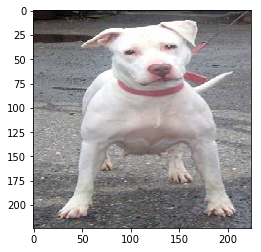

In [67]:
import matplotlib.pyplot as plt
index = 25
plt.imshow(img)

result= np.argmax(preds)
if result==0:
    print("Its a cat")
else:
    print("Its a dog")    